# Initialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy_sz import Class
import matplotlib as mpl

Metal device set to: Apple M1 Pro


2023-03-25 11:43:30.094863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-25 11:43:30.094995: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
def CIB_monopole_Shang2012(zmin=0.005, zmax=6., Mmost_eff=10.**12.6):
    '''function to easily compute the halo model CIB monopole based on Shang+2012(https://arxiv.org/pdf/1109.1522.pdf) 
    using class_sz. Model parameters are taken from Planck fits or are fixed values 
    (see Table I: https://arxiv.org/pdf/2010.16405.pdf) 
    
    Input:
    zmin: minimum redshift 
    zmax: maximum redshift 
    Mmost_eff: most efficient halo mass in Msun (default: 10.**12.6)
    
    Output:
    nu: frequencies [GHz]
    I0: CIB intensity [Jy/sr]
    '''
    
    # the parameters needed for cosmology:
    # use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
    # TT,TE,EE+lowE+lensing+BAO
    cosmo_params = {
    'omega_b': 0.02242,
    'omega_cdm':  0.11933,
    'H0': 67.66, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.047,
    'n_s': 0.9665,

    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06}

    
    Shang_CIB={# class_sz parameters:
            'output':'cib_monopole',
            'Redshift evolution of dust temperature' :  0.36,
            'Dust temperature today in Kelvins' : 24.4,
            'Emissivity index of sed' : 1.75,
            'Power law index of SED at high frequency' : 1.7,
            'Redshift evolution of L − M normalisation' : 3.6,
            'Most efficient halo mass in Msun' : Mmost_eff,
            'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
            'Size of of halo masses sourcing CIB emission' : 0.5,

            # M_min_HOD is the threshold above which nc = 1:
            'M_min_HOD' : 10.**10, #mass threshold for central galaxies in Msun

            'M_min' : 1e10*cosmo_params['H0']/100.,
            'M_max' : 1e16*cosmo_params['H0']/100.,
            
            'mass function': 'T10',
            'T10_alpha_fixed': 0,
            'hm_consistency': 0,
            'redshift_epsrel': 1e-4,
            'redshift_epsabs': 1e-100,
            'mass_epsrel':1e-4,
            'mass_epsabs':1e-100,
            
            'z_min' : zmin,
            'z_max' : zmax,
            'freq_min': 2,
            'freq_max': 5.e4,
            'dlogfreq':0.05}
    
    M = Class()
    M.set(cosmo_params)
    M.set(Shang_CIB)
    M.compute()
    
    nu=np.array(M.cib_monopole()['nu'])
    I0=np.array(M.cib_monopole()['I0'])
    
    return nu, I0

In [3]:
def CIB_monopole_Maniyar2021(zmin=0.005, zmax=6., Mmost_eff=10.**12.94):
    '''function to easily compute the halo model CIB monopole based on Maniyar+2021
    (https://arxiv.org/pdf/2006.16329.pdf) 
    using class_sz.
    
    Input:
    zmin: minimum redshift 
    zmax: maximum redshift 
    Mmost_eff: most efficient halo mass in Msun (default: 10.**12.94)
   
    
    Output:
    nu: frequencies [GHz]
    I0: CIB intensity [Jy/sr]
    '''
    
    # the parameters needed for cosmology:
    # use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
    # TT,TE,EE+lowE+lensing+BAO
    cosmo_params = {
    'omega_b': 0.02242,
    'omega_cdm':  0.11933,
    'H0': 67.66, # use H0 because this is what is used by the emulators.
    'tau_reio': 0.0561,
    'ln10^{10}A_s': 3.047,
    'n_s': 0.9665,

    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06}

    
    Maniyar_CIB={
        'output': 'cib_monopole',
        'mass function' : 'T08M200c',
        'use_maniyar_cib_model':1,
        
        'maniyar_cib_zc' : 1.5,
        'maniyar_cib_tau' : 8.25475287e-01,
        'maniyar_cib_fsub' : 0.134*np.log(10.),
        'Most efficient halo mass in Msun' : Mmost_eff,
        'Size of of halo masses sourcing CIB emission' :  1.5583436676980493,
        #for the Lsat tabulation+Monopole:
        'freq_min': 9e1,
        'freq_max': 1e3,
        'dlogfreq' : 0.05,
        'concentration parameter':'B13', # this sets it to 5


        'use_nc_1_for_all_halos_cib_HOD': 1,

        'sub_halo_mass_function' : 'TW10',#'JvdB14',
        'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
        'use_redshift_dependent_M_min': 0,
        'M_min' : 1e8*cosmo_params['H0']/100., # not used
        'M_max' : 1e15*cosmo_params['H0']/100.,
        'z_min' : zmin,
        'z_max' : zmax,
        'hm_consistency':0,
        
        'has_cib_flux_cut': 0}

    
    M = Class()
    M.set(cosmo_params)
    M.set(Maniyar_CIB)
    M.compute()
    
    nu=np.array(M.cib_monopole()['nu'])
    I0=np.array(M.cib_monopole()['I0'])
    
    return nu, I0

# Shang+2012 CIB monopole example plot

In [8]:
%%time
zmaxs=np.array([1,2,3,4,5,6])
nu_list = []
Inu_list = []
for i in range(len(zmaxs)):
    nu, Icib=CIB_monopole_Shang2012(zmax=zmaxs[i])
    nu_list.append(nu)
    Inu_list.append(Icib)
    # ax1.plot(nu, Icib, label=r"$z_{max}=$"+str(zmaxs[i]), c=cmap1.to_rgba(i*2+5))

CPU times: user 2min 26s, sys: 371 ms, total: 2min 26s
Wall time: 17.7 s


CPU times: user 230 ms, sys: 19.2 ms, total: 249 ms
Wall time: 262 ms


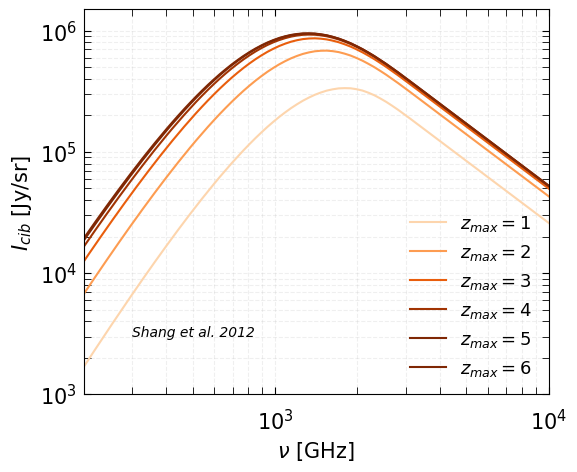

In [9]:
%%time
# zmaxs=np.array([1,2,3,4,5,6])

tot_color=12

norm1 = mpl.colors.Normalize(vmin=3, vmax=12)
cmap1 = mpl.cm.ScalarMappable(norm=norm1, cmap=mpl.cm.Oranges)

label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, ax1 = plt.subplots(1,1, figsize=(6,5))



ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([2e2,1e4])
ax1.set_ylim([10**3,1.5e6])
ax1.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax1.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
plt.setp(ax1.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax1.get_xticklabels(), fontsize=label_size)
ax1.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax1.set_xlabel(r'$\nu$ [GHz]', fontsize=label_size)
ax1.set_ylabel(r'$I_{cib}$ [Jy/sr]', fontsize=label_size)
ax1.text(300, 3000, 'Shang et al. 2012', style='italic')
for i in range(len(zmaxs)):

    nu, Icib=nu_list[i],Inu_list[i]#CIB_monopole_Shang2012(zmax=zmaxs[i])
    ax1.plot(nu, Icib, label=r"$z_{max}=$"+str(zmaxs[i]), c=cmap1.to_rgba(i*2+5))
    #ax1.plot(nu, Icib, label=r"$z_{max}=$"+str(zmaxs[i]), c='black')
    
ax1.legend(fontsize=legend_size, loc='lower right',frameon=False)
plt.savefig('figures/CIB_monopole_Shang2012.pdf')

# Maniyar+2021 CIB monopole example plot

In [4]:
%%time
Mhalo_effs=np.array([10.**11, 10.**12, 10.**13])
nu_list_maniyar = []
Inu_list_maniyar = []
for i in range(len(Mhalo_effs)):
    nu, Icib=CIB_monopole_Maniyar2021(Mmost_eff=Mhalo_effs[i])
    nu_list_maniyar.append(nu)
    Inu_list_maniyar.append(Icib)

CPU times: user 2min 45s, sys: 458 ms, total: 2min 46s
Wall time: 19.2 s


CPU times: user 81.2 ms, sys: 6.82 ms, total: 88.1 ms
Wall time: 83.2 ms


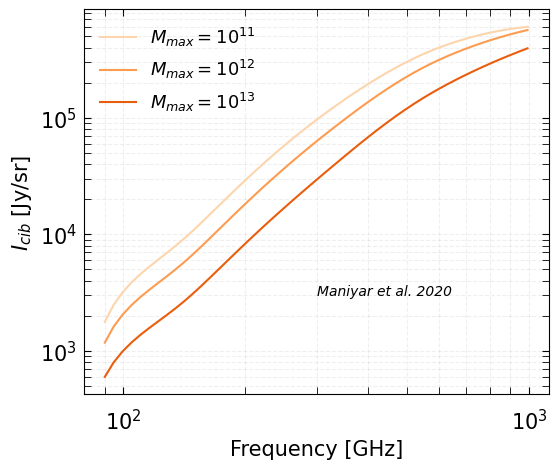

In [6]:
%%time


tot_color=12

norm1 = mpl.colors.Normalize(vmin=3, vmax=12)
cmap1 = mpl.cm.ScalarMappable(norm=norm1, cmap=mpl.cm.Oranges)

label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, ax2 = plt.subplots(1,1, figsize=(6,5))



ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax2.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
plt.setp(ax2.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax2.get_xticklabels(), fontsize=label_size)
ax2.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax2.set_xlabel(r'Frequency [GHz]', fontsize=label_size)
ax2.set_ylabel(r'$I_{cib}$ [Jy/sr]', fontsize=label_size)
ax2.text(300, 3000, 'Maniyar et al. 2020', style='italic')
for i in range(len(Mhalo_effs)):

    nu, Icib=nu_list_maniyar[i],Inu_list_maniyar[i]
    ax2.plot(nu, Icib, label=r"$M_{max} = 10^{%d}$"%(int(np.log10(Mhalo_effs[i]))), c=cmap1.to_rgba(i*2+5))
    #ax2.plot(nu, Icib, label=r"$z_{max}=$"+str(Mhalo_effs[i]), c='black')
    
ax2.legend(fontsize=legend_size,frameon=False)
# plt.savefig('figures/CIB_monopole_Maniya2021.pdf')

# Both Shang+2012 and Maniyar+2021 CIB monopole

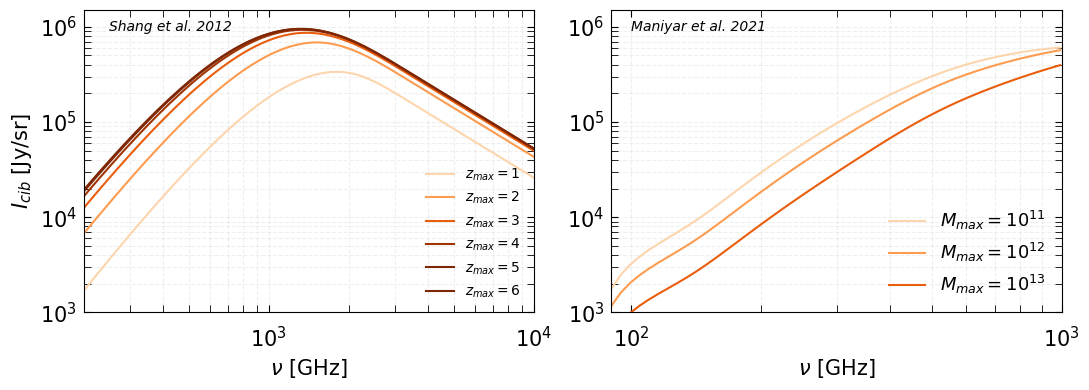

In [16]:
zmaxs=np.array([1,2,3,4,5,6])

#plot settings


norm1 = mpl.colors.Normalize(vmin=3, vmax=12)
cmap1 = mpl.cm.ScalarMappable(norm=norm1, cmap=mpl.cm.Oranges)

label_size = 15
title_size = 20
legend_size = 10
handle_length = 1.5
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))


ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([2e2,1e4])
ax1.set_ylim([10**3,1.5e6])
ax1.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax1.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
plt.setp(ax1.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax1.get_xticklabels(), fontsize=label_size)
ax1.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax1.set_xlabel(r'$\nu$ [GHz]', fontsize=label_size)
ax1.set_ylabel(r'$I_{cib}$ [Jy/sr]', fontsize=label_size)
ax1.text(250, 9e5, 'Shang et al. 2012', style='italic')

#plot as a function of zmax
for i in range(len(zmaxs)):

    nu, Icib=nu_list[i],Inu_list[i]#CIB_monopole_Shang2012(zmax=zmaxs[i])
    ax1.plot(nu, Icib, label=r"$z_{max}=$"+str(zmaxs[i]), c=cmap1.to_rgba(i*2+5))
    #ax1.plot(nu, Icib, label=r"$z_{max}=$"+str(zmaxs[i]), c='black')
    
ax1.legend(fontsize=legend_size, loc='lower right',frameon=False)


# Mhalo_effs=np.array([10.**11.94, 10.**12.94, 10.**13.94])
# Mhalo_effs_label=np.array([r'$11.94 M_{\odot}$', r'$12.94 M_{\odot}$', r'$13.94 M_{\odot}$'])

#plot settings

norm2 = mpl.colors.Normalize(vmin=3, vmax=12)
cmap2 = mpl.cm.ScalarMappable(norm=norm1, cmap=mpl.cm.Blues)

label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5



ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([9e1,1e3])
ax2.set_ylim([10**3,1.5e6])
ax2.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax2.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
plt.setp(ax2.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax2.get_xticklabels(), fontsize=label_size)
ax2.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax2.set_xlabel(r'$\nu$ [GHz]', fontsize=label_size)
ax2.text(100, 9e5, 'Maniyar et al. 2021', style='italic')

#plot as a function of most efficient halo mass
# for i in range(len(Mhalo_effs)):

#     nu, Icib=CIB_monopole_Maniyar2021(Mmost_eff=Mhalo_effs[i])
#     ax2.plot(nu, Icib, label=r"$log_{10}M_{max}=$"+str(Mhalo_effs_label[i]), c=cmap2.to_rgba(i*2+5))
    #ax2.plot(nu, Icib, label=r"$z_{max}=$"+str(Mhalo_effs[i]), c='black')
for i in range(len(Mhalo_effs)):

    nu, Icib=nu_list_maniyar[i],Inu_list_maniyar[i]
    ax2.plot(nu, Icib, label=r"$M_{max} = 10^{%d}$"%(int(np.log10(Mhalo_effs[i]))), c=cmap1.to_rgba(i*2+5))
    #ax2.plot(nu, Icib, label=r"$z_{max}=$"+str(Mhalo_effs[i]), c='black')
    
ax2.legend(fontsize=legend_size, loc='lower right',frameon=False)
plt.tight_layout()
plt.savefig('figures/CIB_monopole_Shang2012_and_Maniyar2021.pdf')